# CS2545 - Term Mini-Project

### **CS2545** - Data Science ###
### Winter, 2025 ###
### UNB, Fredericton ###

#### **Authors**:
- **Will Ross** - #3734692
- **Alex Cameron** - #3680202

</br>

<div style="page-break-after: always;"></div>


## Introduction




As Canada transitions toward a more sustainable energy future, understanding regional patterns in electricity generation and consumption has become increasingly important. This project explores the distribution of renewable and fossil fuel-based power across provinces, evaluating how geography, infrastructure, and policy influence energy outcomes. 

&nbsp;&nbsp;&nbsp;&nbsp; The analysis addresses two major challenges: significant regional disparities in energy sources and the absence of a unified national energy strategy. Using data from 2005 to 2050, including historical and projected values, this study examines electricity generation and capacity, sectoral demand, pricing differences, and import/export trends at both provincial and national levels. 

&nbsp;&nbsp;&nbsp;&nbsp;Public datasets from Natural Resources Canada (NRCan), Statistics Canada, and the Canadian Energy Regulator (CER) were analyzed using Python tools in Jupyter Notebooks. Key metrics include per capita energy use, generation efficiency, and trade balances. Data were normalized to enable meaningful cross-provincial comparisons, and visualizations were used to highlight trends and disparities. This project ultimately aims to identify where energy systems are efficient, where improvements are needed, and how better integration across provinces could benefit Canada’s energy landscape.

In [74]:
# Imports & Pip Installs if needed 
# comment out if not required :
# %pip install matplotlib
# %pip install pandas
# %pip install plotly
# %pip install seaborn
# %pip install openpyxl

# Importing all the goodies
import pandas as pd

# ploting imports
import matplotlib.pyplot as plt
import seaborn as sns
# i wanted this for the money formating on our charts
import matplotlib.ticker as ticker

# All Data to import using dataframes
population_Data_Path = "../data/population.csv"
Electricity_Generation_Data_Path = "../data/Electricity_Generation.xlsx"
Electricity_Interchange_Data_Path = "../data/Electricity_Interchange.xlsx"
Electricity_Capacity_Data_Path = "../data/Electricity_Capacity.xlsx"
End_Use_Demand_Data_Path = "../data/End_Use_Demand.xlsx"
End_Use_Prices_Data_Path = "../data/End_Use_Prices.xlsx"
energy_trade_canada_path = "../data/energy_trade_canada.xls"
Canadian_Climate_Normals_CANADA_Data_Path = "../data/1991-2020_Canadian_Climate_Normals_CANADA_Data.csv"

## Legend
- `power_generation_df` - DataFrame for power generation data post cleaning
- `power_capacity_df` - DataFrame for power capacity data post cleaning
- `power_interchange_df` - DataFrame for power interchange data post cleaning
- `power_prices_df` - DataFrame for power prices data post cleaning
- `power_demand_df` - DataFrame for power demand data post cleaning
- `canada_population_df` - DataFrame for Canada population data post cleaning

## Approach 

The approach using Python within Jupyter Notebooks. Key libraries included Pandas and Matplotlib, which was used to data wrangling, visualize, and analyze statistics. One of the primary goals was to evaluate electricity generation across Canada’s provinces. This provided insights into each province’s individual contribution, as well as their role in Canada's national energy production. Additional analysis included provincial and federal data on population, electricity pricing, and import/export activity, to identify both strengths and areas for improvement in the energy sector.  

&nbsp;&nbsp;&nbsp;&nbsp;Data was sourced from publicly available, trusted government portals and energy agencies. Unlike prior coursework datasets, these files required cleaning and preprocessing. Collected files included both .csv and .xlsx formats. To ensure consistency, datasets were primarily acquired from a single source, allowing for more standardized formatting. Each province’s data was organized into its own table, allowing of a reusable functions. This design allowed for parsing of fields such as province, year, energy type, and energy output or consumption. 

&nbsp;&nbsp;&nbsp;&nbsp;Sector-specific energy demand data was also analyzed. The dataset, provided by the Canadian government, was split into energy use across residential, commercial, industrial, transportation, and total demand sectors. The data could then be processed into a dataframe with columns: sector, year, energy type, and energy quantity in petajoules (PJ). We had to convert PJ to gigawatt-hours (GWh) for ease of use later on. Provincial energy pricing was also processed, showing the difference power prices throughout Canada. E.g. Quebec’s low-cost hydro power compared to Alberta’s higher-cost fossil fuel generation. 


## Cleaning Data

#### Power Generation Data

In [75]:
# power Generation Data
generation_df = pd.read_excel(Electricity_Generation_Data_Path)

# function for cleaning generation data - used across multiple data sets
def clean_generation(df, start_row, province_name, num_rows = 8):
    header_row = start_row + 1
    data_rows = start_row + 2

    headers = df.iloc[header_row]
    block = df.iloc[data_rows : data_rows + num_rows].copy()
    block.columns = headers

    block = block.dropna(subset=[block.columns[0]])
    block = block.rename(columns={block.columns[0]: "Energy_Type"})
    block = block.melt(id_vars="Energy_Type", var_name="Year", value_name="GWh")

    block["Province"] = province_name
    block["Year"] = pd.to_numeric(block["Year"], errors="coerce")
    block["GWh"] = pd.to_numeric(block["GWh"], errors="coerce")

    block = block.dropna(subset=["Year", "GWh"])
    block["Year"] = block["Year"].astype(int)

    return block

# dictionary to get the proper rows for each table in teh dataset
provinces_generation = {
    "Canada": 5,
    "Newfoundland and Labrador": 16,
    "Prince Edward Island": 27,
    "Nova Scotia": 38,
    "New Brunswick": 49,
    "Quebec": 60,
    "Ontario": 71,
    "Manitoba": 82,
    "Alberta": 93,
    "British Columbia": 104,
    "Saskatchewan": 115,
    "Yukon": 126,
    "Northwest Territories": 137,
    "Nunavut": 148,
}
all_province_data = []
for province, start_row in provinces_generation.items():
    cleaned = clean_generation(generation_df, start_row, province)
    all_province_data.append(cleaned)

gen_clean = pd.concat(all_province_data, ignore_index=True)
power_generation_df = gen_clean


#### Power Capacity Data

In [76]:
capacity_df = pd.read_excel(Electricity_Capacity_Data_Path)

provinces_cap = {
    "Canada": 5,
    "Newfoundland and Labrador": 16,
    "Prince Edward Island": 27,
    "Nova Scotia": 38,
    "New Brunswick": 49,
    "Quebec": 60,
    "Ontario": 71,
    "Manitoba": 82,
    "Alberta": 93,
    "British Columbia": 104,
    "Saskatchewan": 115,
    "Yukon": 126,
    "Northwest Territories": 137,
    "Nunavut": 148,
}

all_province_cap_data = []
for province, start_row in provinces_cap.items():
    cap_cleaned = clean_generation(capacity_df, start_row, province)
    all_province_cap_data.append(cap_cleaned)

cap_clean = pd.concat(all_province_cap_data, ignore_index=True)
power_capacity_df = cap_clean

#### Power InterChange Data

In [77]:
interchange_df = pd.read_excel(Electricity_Interchange_Data_Path)
provinces_interchange = {
    "Canada": 4,
    "Newfoundland and Labrador": 13,
    "Prince Edward Island": 22,
    "Nova Scotia": 31,
    "New Brunswick": 40,
    "Quebec": 49,
    "Ontario": 58,
    "Manitoba": 67,
    "Alberta": 76,
    "British Columbia": 85,
    "Saskatchewan": 94,
}

all_province_interchange_data = []
for province, start_row in provinces_interchange.items():
    clean_interchange_block = clean_generation(interchange_df, start_row, province)
    all_province_interchange_data.append(clean_interchange_block)

interchange_clean = pd.concat(all_province_interchange_data, ignore_index=True)
power_interchange_df = interchange_clean

#### End User Price Data

In [78]:
prices_df = pd.read_excel(End_Use_Prices_Data_Path)

prices_provinces = {
    "Canada": 0,
    "Newfoundland and Labrador": 5,
    "Prince Edward Island": 11,
    "Nova Scotia": 17,
    "New Brunswick": 23,
    "Quebec": 29,
    "Ontario": 35,
    "Manitoba": 41,
    "Alberta": 47,
    "British Columbia": 53,
    "Saskatchewan": 59,
    "Yukon": 65,
    "Northwest Territories": 71,
    "Nunavut": 77,
}
year_filter = 2025
all_province_price_data = []

for province, start_row in prices_provinces.items():
    clean_block = clean_generation(prices_df, start_row, province, num_rows=3)
    all_province_price_data.append(clean_block)

prices_clean = pd.concat(all_province_price_data, ignore_index=True)
power_prices_df = prices_clean

#  function was used in both provincial and national data
def get_prices(df_prices, df_energy, filter_import_export="Total_Exports", year=2025):
    total_dollars = df_prices[(df_prices["Year"] == year) & (df_prices["Energy_Type"] == "Electricity")].copy()
    total_dollars["Cost_per_GWh"] = total_dollars["GWh"] * 1000  

    total_dollars = pd.merge(total_dollars, df_energy, on="Province", how="inner")
    total_dollars["Total_Profit"] = total_dollars["Cost_per_GWh"] * total_dollars[filter_import_export]
    return total_dollars[["Province", "Total_Profit"]]




#### Population Data

In [79]:

def clean_population_database_format(filepath):

    df = pd.read_csv(filepath)
    df = df[["REF_DATE", "GEO", "VALUE"]].rename(columns={
        "REF_DATE": "Date",
        "GEO": "Province",
        "VALUE": "Population"
    })

    df = df.dropna(subset=["Population"])
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"] = df["Date"].dt.year

    df_yearly = (
        df.groupby(["Province", "Year"], as_index=False)
        .agg({"Population": "mean"})
    )

    return df_yearly

population_yearly_df = clean_population_database_format(population_Data_Path)
canada_population_df = population_yearly_df

#### End Use demand Data

In [80]:
demand_df = pd.read_excel(End_Use_Demand_Data_Path)

sector_blocks = {
    "Total End-Use": 5,
    "Residential": 14,
    "Commercial": 26,        
    "Industrial": 35,        
    "Transportation": 44
}

def clean_end_use_demand(df, sector_blocks, num_rows=7):
    
    all_sectors = []
    for sector, start_row in sector_blocks.items():
        header_row = start_row + 1
        data_start = start_row + 2

        headers = df.iloc[header_row]
        block = df.iloc[data_start : data_start + num_rows].copy()
        block.columns = headers

        block = block.dropna(subset=[block.columns[0]])
        block = block.rename(columns={block.columns[0]: "Energy_Type"})

        block = block.melt(id_vars="Energy_Type", var_name="Year", value_name="PJ")
        block["Sector"] = sector
        block["Year"] = pd.to_numeric(block["Year"], errors="coerce")
        block["PJ"] = pd.to_numeric(block["PJ"], errors="coerce")

        block = block.dropna(subset=["Year", "PJ"])
        block["Year"] = block["Year"].astype(int)

        all_sectors.append(block)

    return pd.concat(all_sectors, ignore_index=True)

demand_clean = clean_end_use_demand(demand_df, sector_blocks, num_rows=20)
power_demand_df = demand_clean

## Data Manipulation

### Power Generation Types, Generation & Capacity

#### Generation by Canada as a whole

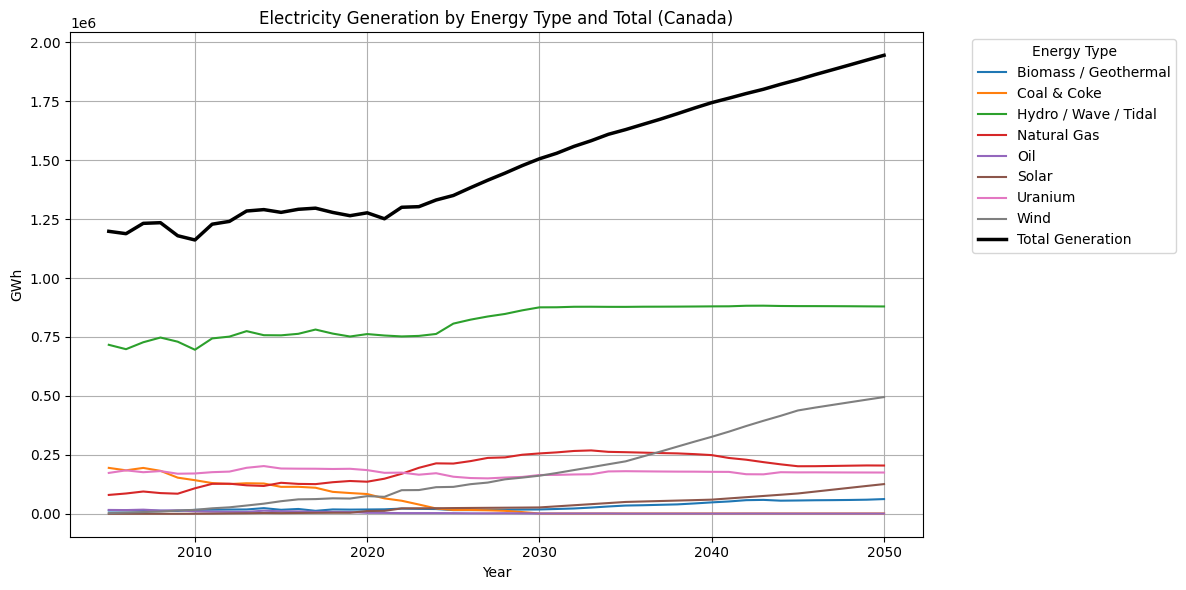

In [81]:
total_generation = (
    power_generation_df.groupby("Year", as_index=False)
    .agg({"GWh": "sum"})
    .rename(columns={"GWh": "Total_GWh"})
)

generation_by_type = (
    power_generation_df.groupby(["Year", "Energy_Type"], as_index=False)
    .agg({"GWh": "sum"})
    .pivot(index="Year", columns="Energy_Type", values="GWh")
)

ax = generation_by_type.plot(
    figsize=(12, 6), 
    title="Electricity Generation by Energy Type and Total (Canada)",
    linewidth=1.5
)

ax.plot(total_generation["Year"], total_generation["Total_GWh"], color="black", linewidth=2.5, label="Total Generation")
ax.set_xlabel("Year")
ax.set_ylabel("GWh")
ax.grid(True)
ax.legend(title="Energy Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


##### Results 
As seen in the `Electricity Generation by Energy Type and Total`, showing the energy type from 2005 to 2050. The data shows that Hydro is biggest source and that it is the most stable over time. It also shows that Natural gas will peek around 2032 and then drop off as more eco-friendly sources are used. The data also shows that coal will be nearly completely phased out by 2029.

#### Generation by every province

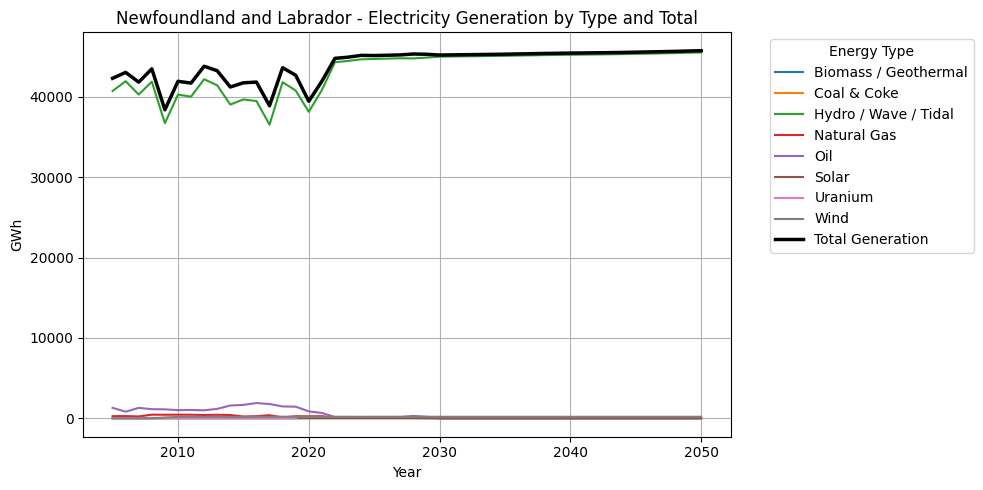

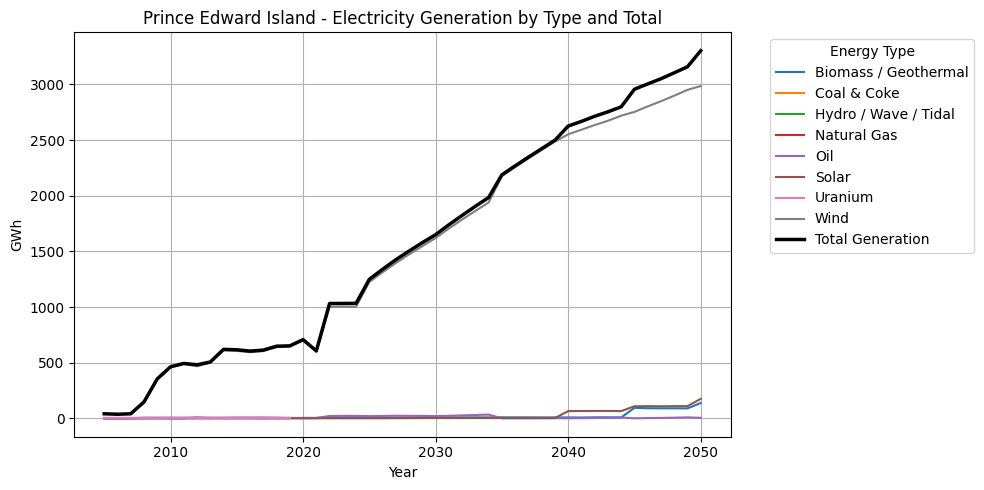

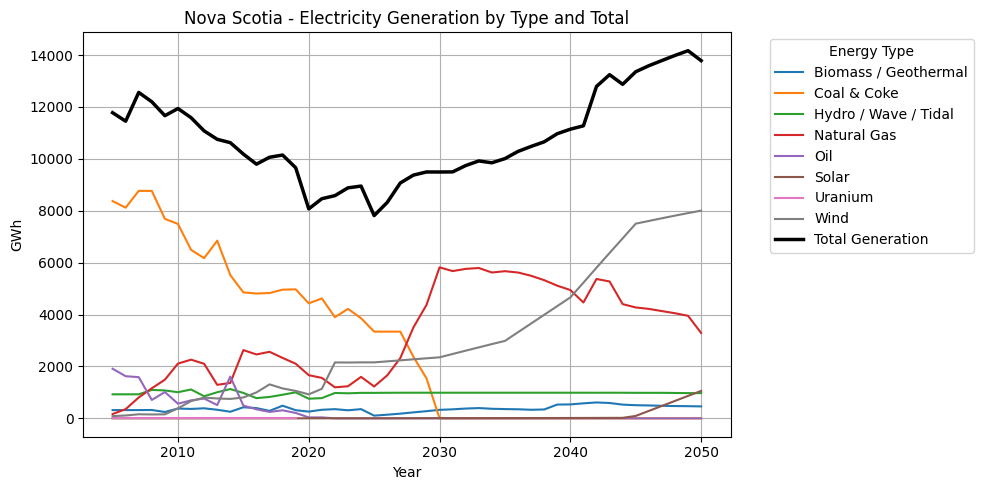

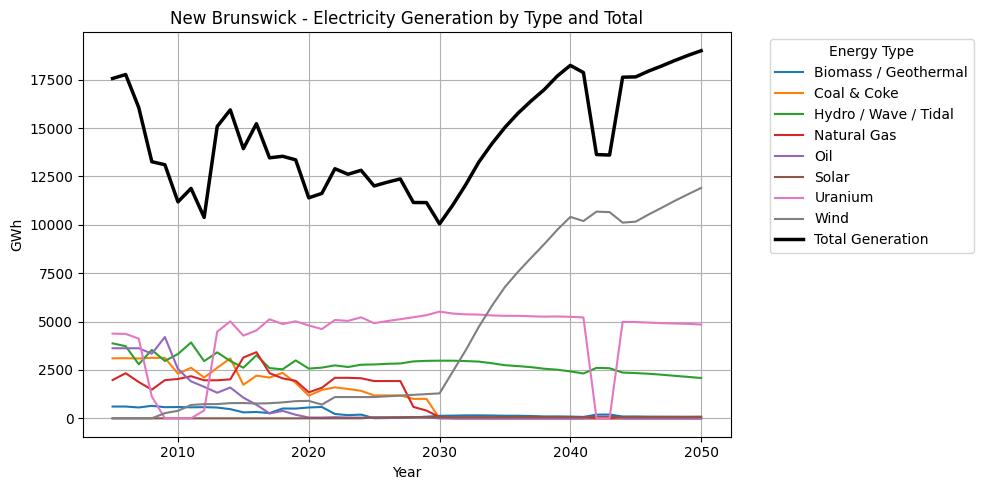

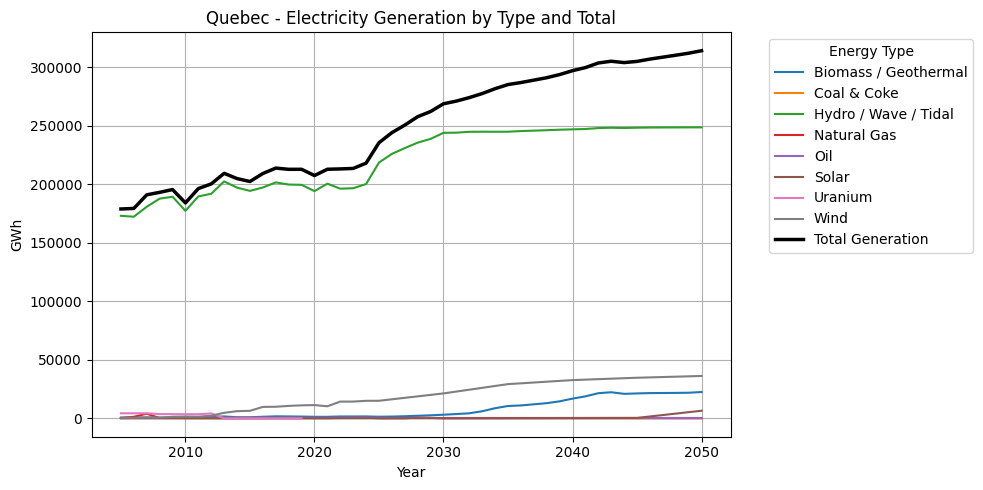

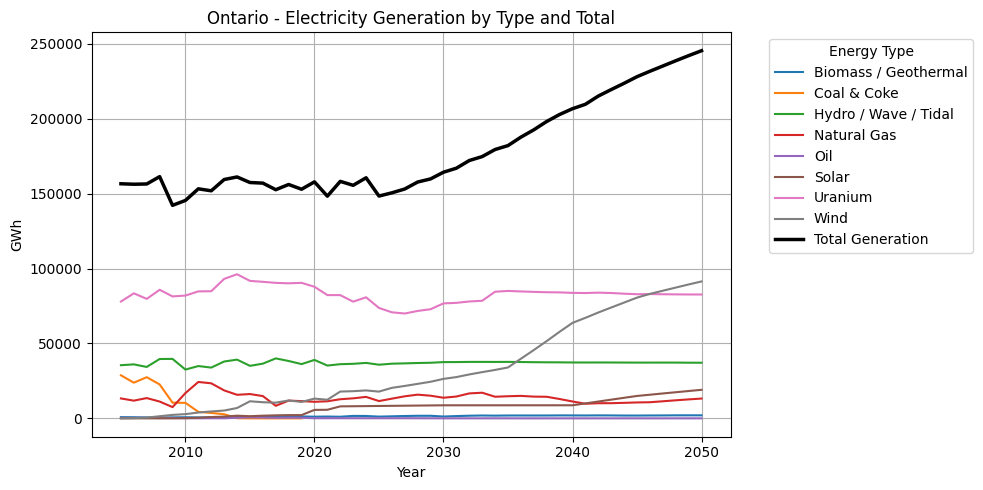

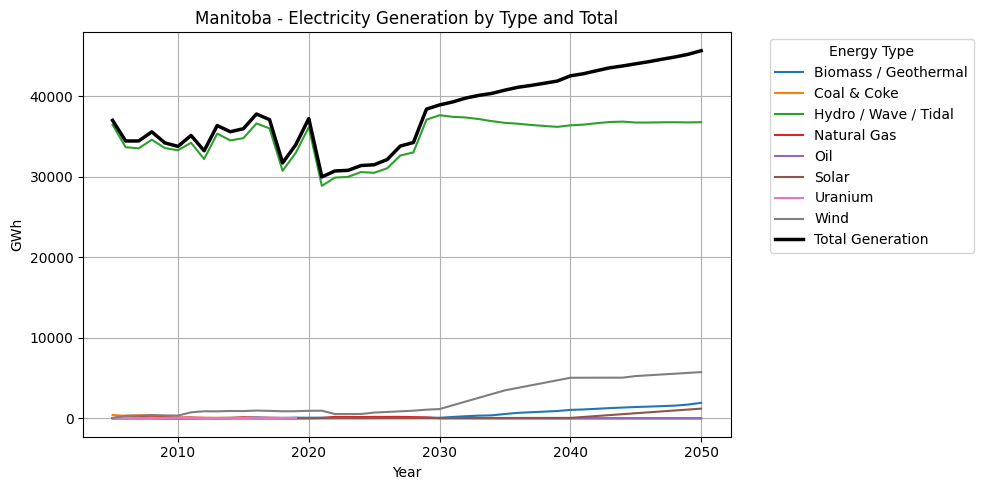

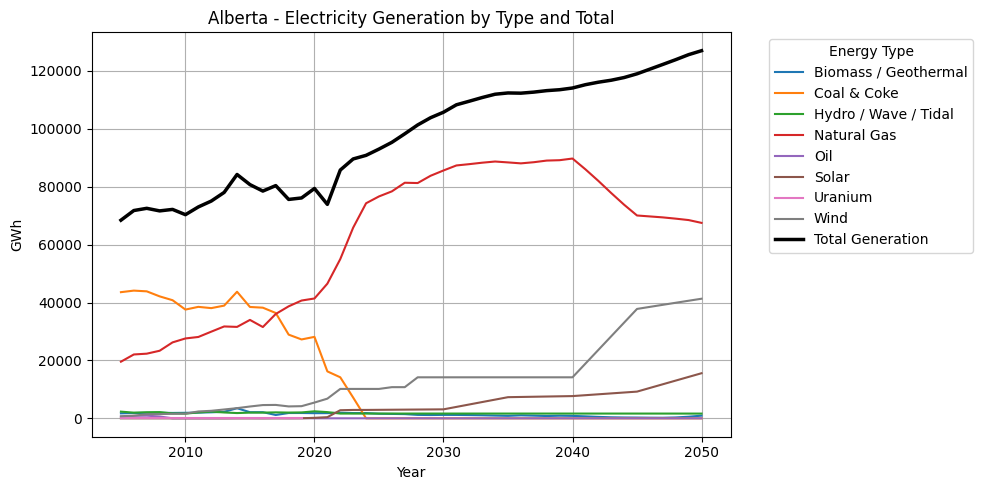

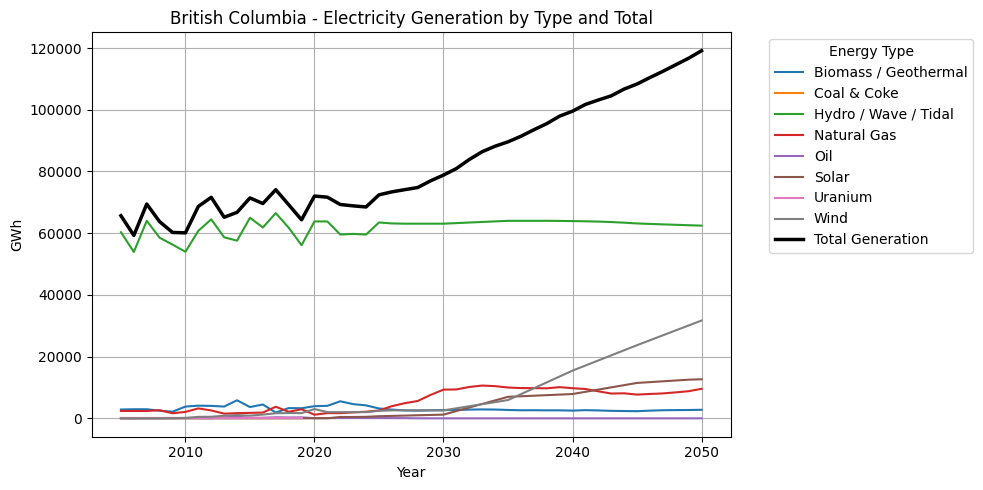

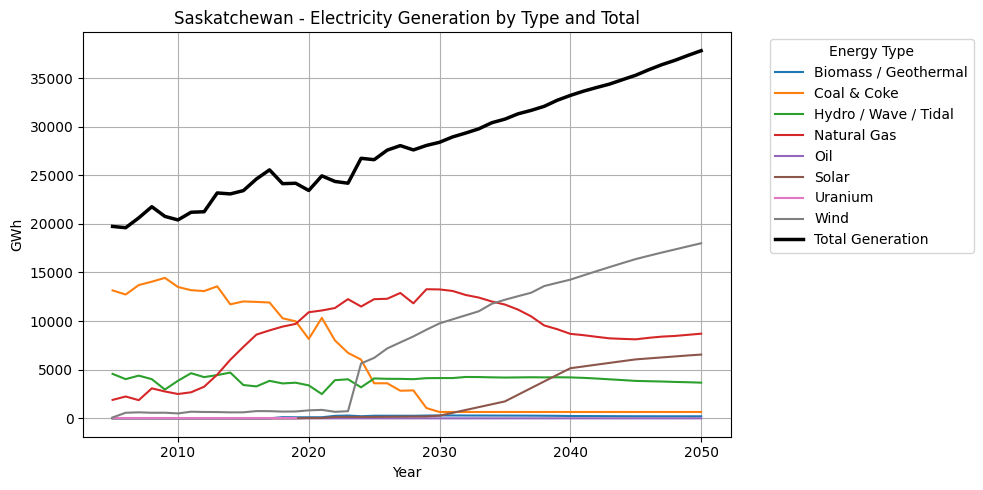

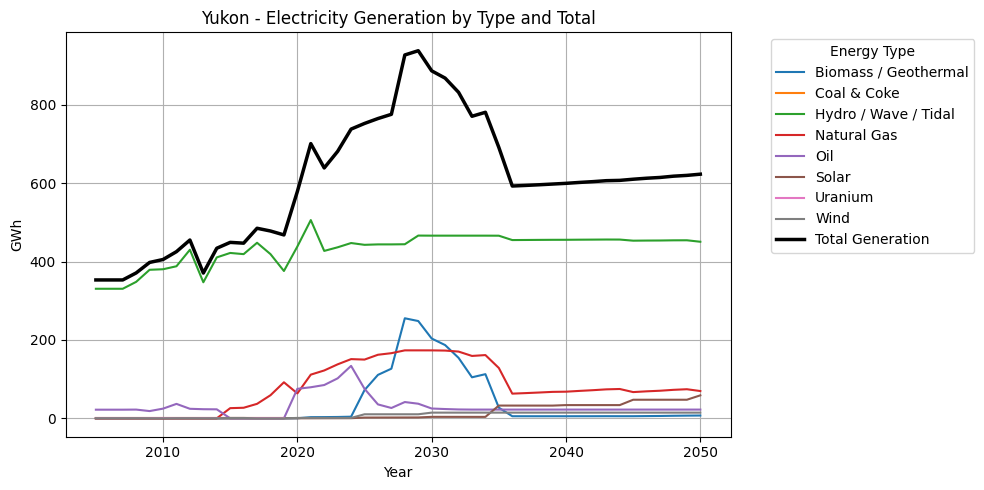

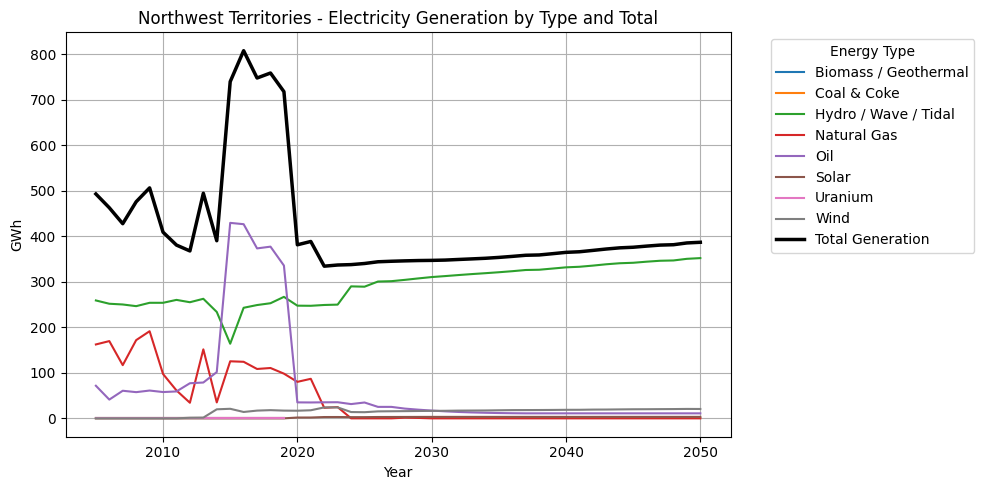

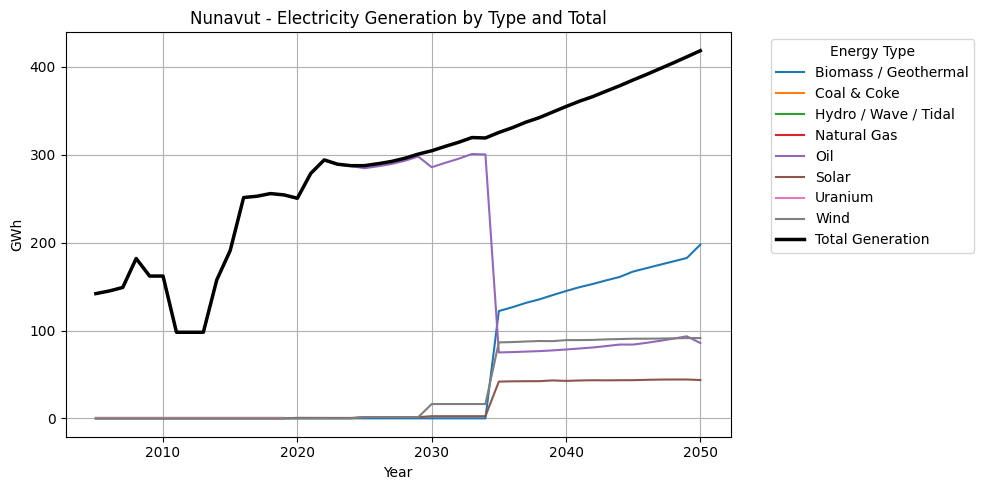

In [82]:
provinces_to_plot = [
    "Newfoundland and Labrador",
    "Prince Edward Island",
    "Nova Scotia",
    "New Brunswick",
    "Quebec",
    "Ontario",
    "Manitoba",
    "Alberta",
    "British Columbia",
    "Saskatchewan",
    "Yukon",
    "Northwest Territories",
    "Nunavut",
    # "Canada", 
]

for province in provinces_to_plot:
    province_df = power_generation_df[power_generation_df["Province"] == province]

    # generation per year
    total = (
        province_df.groupby("Year", as_index=False)
        .agg({"GWh": "sum"})
        .rename(columns={"GWh": "Total_GWh"})
    )

    # by energy type
    by_type = (
        province_df.groupby(["Year", "Energy_Type"], as_index=False)
        .agg({"GWh": "sum"})
        .pivot(index="Year", columns="Energy_Type", values="GWh")
    )

    # plotting
    ax = by_type.plot(
        figsize=(10, 5), 
        title=f"{province} - Electricity Generation by Type and Total",
        linewidth=1.5
    )

    ax.plot(total["Year"], total["Total_GWh"], color="black", linewidth=2.5, label="Total Generation")
    ax.set_xlabel("Year")
    ax.set_ylabel("GWh")
    ax.grid(True)
    ax.legend(title="Energy Type", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()

##### Results 
The results show each province's generation by energy type. The data shows that Quebec and BC are the biggest producers of Hydro. It shows a mixture on energy sources in Ontario such as nuclear and natural gas but leading towards hydro over time.

#### Power Capacity 


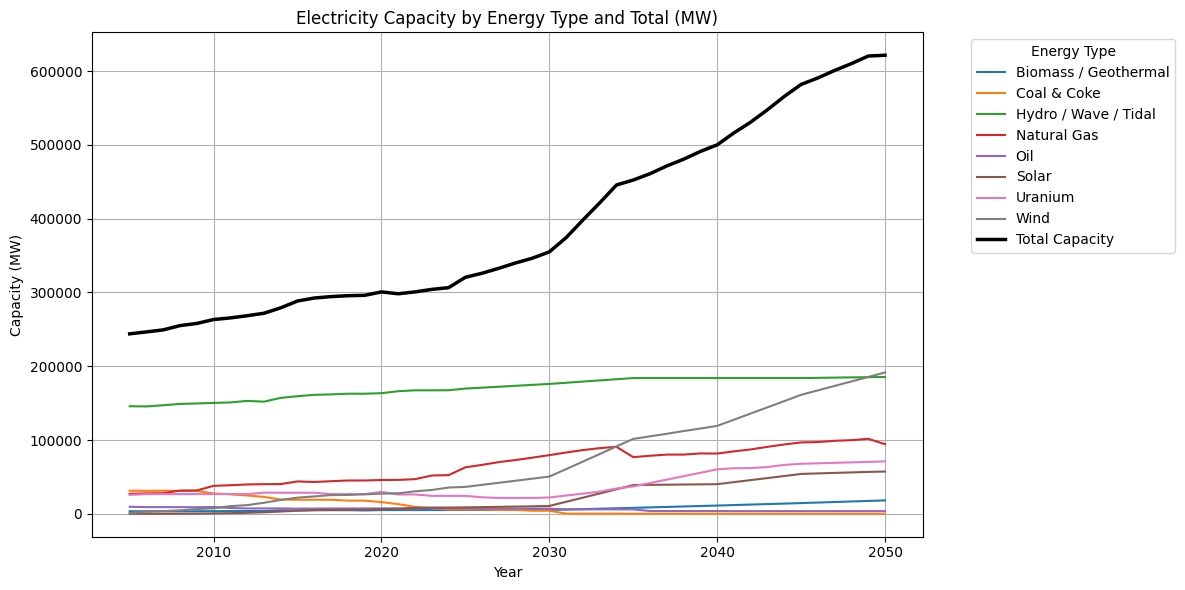

In [83]:
total_capacity = (
    power_capacity_df.groupby("Year", as_index=False)
    .agg({"GWh": "sum"}) 
    .rename(columns={"GWh": "Total_MW"})
)
capacity_by_type = (
    power_capacity_df.groupby(["Year", "Energy_Type"], as_index=False)
    .agg({"GWh": "sum"})  
    .pivot(index="Year", columns="Energy_Type", values="GWh")
)
# plot
ax = capacity_by_type.plot(
    figsize=(12, 6), 
    title="Electricity Capacity by Energy Type and Total (MW)",
    linewidth=1.5
)

ax.plot(total_capacity["Year"], total_capacity["Total_MW"], color="black", linewidth=2.5, label="Total Capacity")
ax.set_xlabel("Year")
ax.set_ylabel("Capacity (MW)")
ax.grid(True)
ax.legend(title="Energy Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

##### Results
The data shows that hydro is the current biggest source of power capacity up until the year 2048. 2048 wind passes the hydro for the biggest power capacity. The data also shows that coal is being phased out and will be completely phased out by 2030.

#### Analyze energy production in different regions of Canada

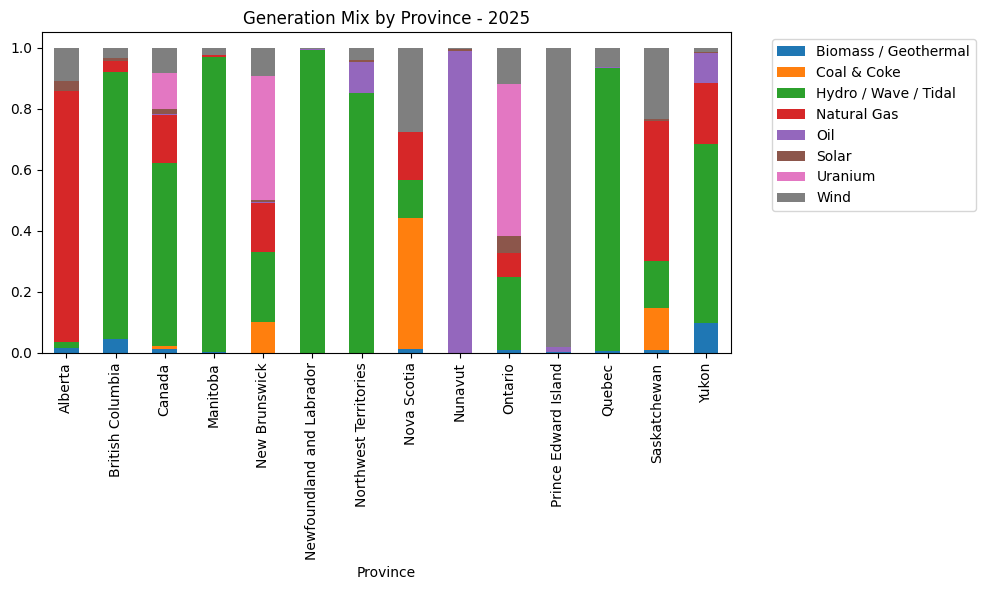

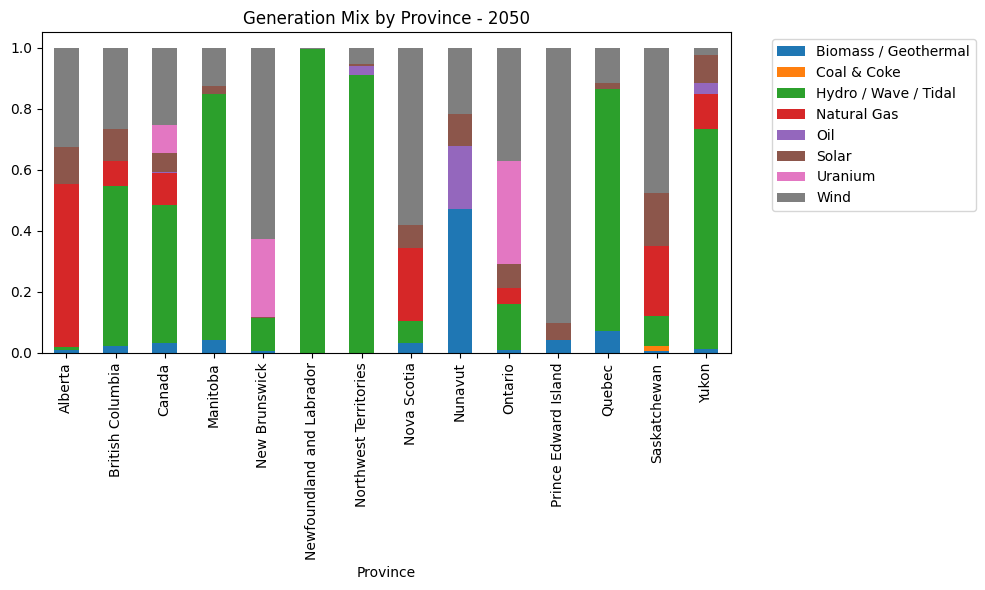

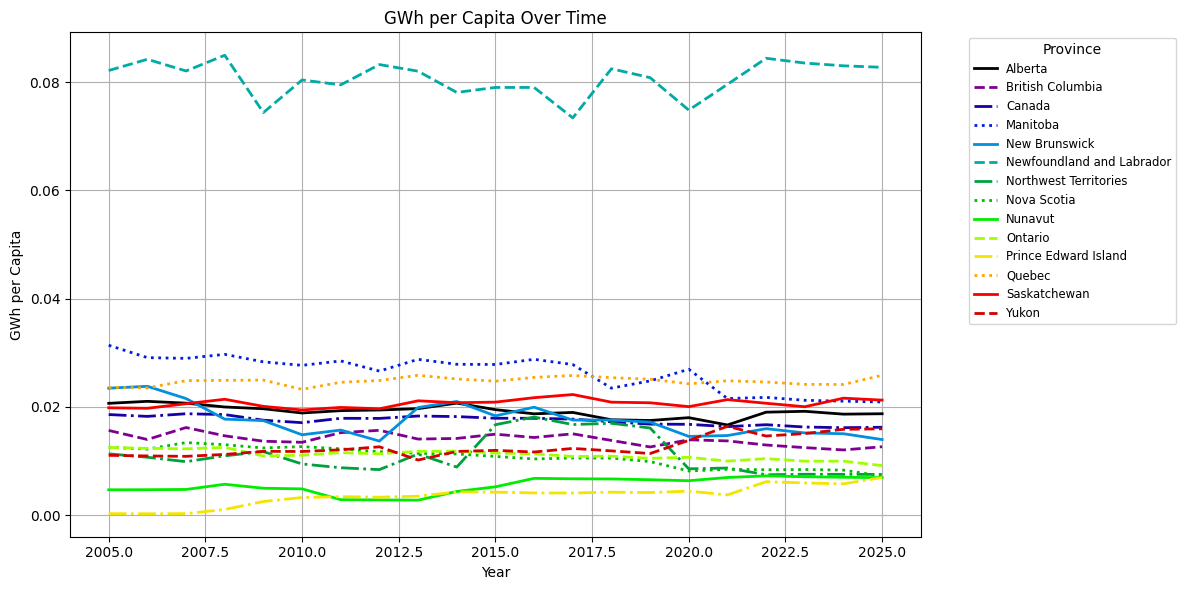

In [84]:
def get_total_gwh_per_province(df):
    return df.groupby(["Province", "Year"], as_index=False).agg({"GWh": "sum"})

def get_per_capita_GWh(df_gwh, df_population):
    merged_df = pd.merge(df_gwh, df_population, on=["Province", "Year"], how="inner")    
    merged_df["GWh_per_Capita"] = merged_df["GWh"] / merged_df["Population"]
    return merged_df[["Province", "Year", "GWh_per_Capita"]]

def get_per_GWh_MW(df_gwh, df_mw):
    total_mw = df_mw.groupby(["Province", "Year"], as_index=False).agg({"GWh": "sum"})
    total_mw = total_mw.rename(columns={"GWh": "MW"})
    merged_df = pd.merge(df_gwh, total_mw, on=["Province", "Year"], how="inner")
    merged_df["GWh_per_MW"] = merged_df["GWh"] / merged_df["MW"]
    return merged_df[["Province", "Year", "GWh_per_MW"]]

total_gwh_per_province = get_total_gwh_per_province(power_generation_df)
per_capita = get_per_capita_GWh(total_gwh_per_province, canada_population_df)
per_capita = get_per_GWh_MW(total_gwh_per_province, power_capacity_df)

def get_generation_mix(df):
    generation_mix = df.groupby(["Province", "Year", "Energy_Type"], as_index=False).agg({"GWh": "sum"})
    generation_mix["GWh"] = generation_mix["GWh"] / generation_mix.groupby(["Province", "Year"])["GWh"].transform("sum")
    return generation_mix

generation_mix = get_generation_mix(power_generation_df)
display_stacked_barChar_GHw_per_Prov = True
display_lineChar_GHw_per_Capita = True
years_wanted = [2025, 2050] 

if display_stacked_barChar_GHw_per_Prov:
    for year in years_wanted:
        mix_year = generation_mix[generation_mix["Year"] == year]
        mix_pivot = mix_year.pivot(index="Province", columns="Energy_Type", values="GWh")
        mix_pivot.plot(
            kind="bar", 
            stacked=True, 
            figsize=(10, 6), 
            title=f"Generation Mix by Province - {year}"
        )
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

if display_lineChar_GHw_per_Capita:
    per_capita_line = get_per_capita_GWh(total_gwh_per_province, population_yearly_df)
    pivot = per_capita_line.pivot(index="Year", columns="Province", values="GWh_per_Capita")
    provinces = pivot.columns
    num_provinces = len(provinces)
    cmap = plt.get_cmap("nipy_spectral")  
    colors = [cmap(i / num_provinces) for i in range(num_provinces)]
    linestyles = ['-', '--', '-.', ':']
    fig, ax = plt.subplots(figsize=(12, 6))
    for i, province in enumerate(provinces):
        ax.plot(
            pivot.index, 
            pivot[province], 
            label=province, 
            color=colors[i],
            linestyle=linestyles[i % len(linestyles)],
            linewidth=2
        )
    ax.set_title("GWh per Capita Over Time")
    ax.set_xlabel("Year")
    ax.set_ylabel("GWh per Capita")
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", title="Province")
    plt.tight_layout()
    plt.show()

##### Results
The data shows the energy production in each region of Canada. Both in the year 2025 and 2050 to see trends of renewable energy sources across Canada. In 2025 hydro is the biggest source of energy in almost all regions. By 2050 wind will be the biggest source of energy in all regions. The data also shows that natural gas is being phased out in all regions. The figure of the GWh of energy per capita, shows that the North West Territories consistently uses the most energy while PEI and Ontario use the least. This is mostly due to climate and population density of these provinces.

### Power Interchange (Both With Canda and US and By provinces)

#### National Interchange (Canada Importing and Exporting with the USA)

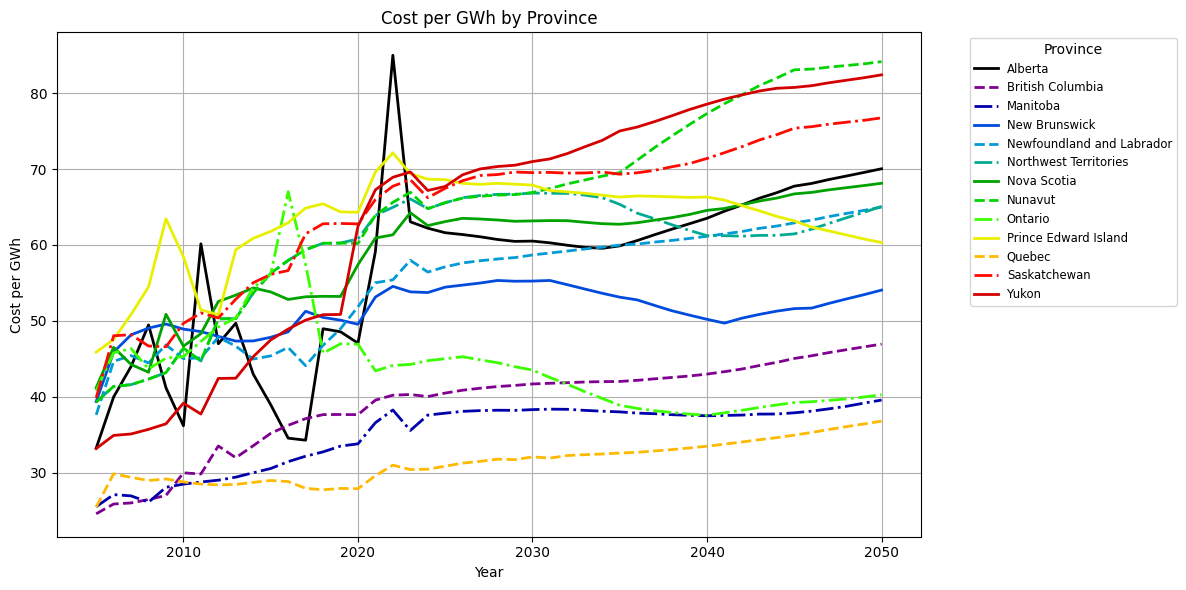

In [85]:
# get the total exports by province
def get_total_national_imports(df, year=2025):
    total_imports = df[df["Year"] == year].copy()
    total_imports = total_imports[total_imports["Energy_Type"] == "Imports"]
    total_imports = total_imports.groupby("Province", as_index=False).agg({"GWh": "sum"})
    total_imports = total_imports.rename(columns={"GWh": "Total_Imports"})
    return total_imports

# get the total imports by province
def get_total_national_exports(df, year=2025):
    total_exports = df[df["Year"] == year].copy()
    total_exports = total_exports[total_exports["Energy_Type"] == "Exports"]
    total_exports = total_exports.groupby("Province", as_index=False).agg({"GWh": "sum"})
    total_exports = total_exports.rename(columns={"GWh": "Total_Exports"})
    return total_exports

national_exports = get_total_national_exports(power_interchange_df, year=year_filter)
national_imports = get_total_national_imports(power_interchange_df, year=year_filter)
national_import_export = pd.merge(national_exports, national_imports, on="Province", how="outer")

# per province prices (cause some provinces produce cheaper energy like quebec)
def get_Price_by_Province(df_prices, year=year_filter):
    total_dollars = df_prices[df_prices["Energy_Type"] == "Electricity"].copy()
    return total_dollars
province_energy_prices = get_Price_by_Province(power_prices_df, year=year_filter)
pivot = province_energy_prices.pivot(index="Year", columns="Province", values="GWh")

num_provinces = len(pivot.columns)
cmap = plt.get_cmap("nipy_spectral")
colors = [cmap(i / num_provinces) for i in range(num_provinces)]
linestyles = ['-', '--', '-.']
fig, ax = plt.subplots(figsize=(12, 6))
for i, province in enumerate(pivot.columns):
    ax.plot(
        pivot.index,
        pivot[province],
        label=province,
        color=colors[i],
        linestyle=linestyles[i % len(linestyles)],
        linewidth=2
    )
ax.set_title("Cost per GWh by Province")
ax.set_xlabel("Year")
ax.set_ylabel("Cost per GWh")
ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", title="Province")
plt.tight_layout()
plt.show()

##### Results
The data reflected electricity prices are lowest in Quebec and highest in Nunavut and Yukon. Most provinces see prices go up from 2025 to 2050, especially in the north and in Saskatchewan. In 2025, Quebec and Ontario export the most. Alberta and Atlantic Canada import more than they export. Hydro provinces send power to places with less supply or higher costs.

#### Provincial Import and Export Totals

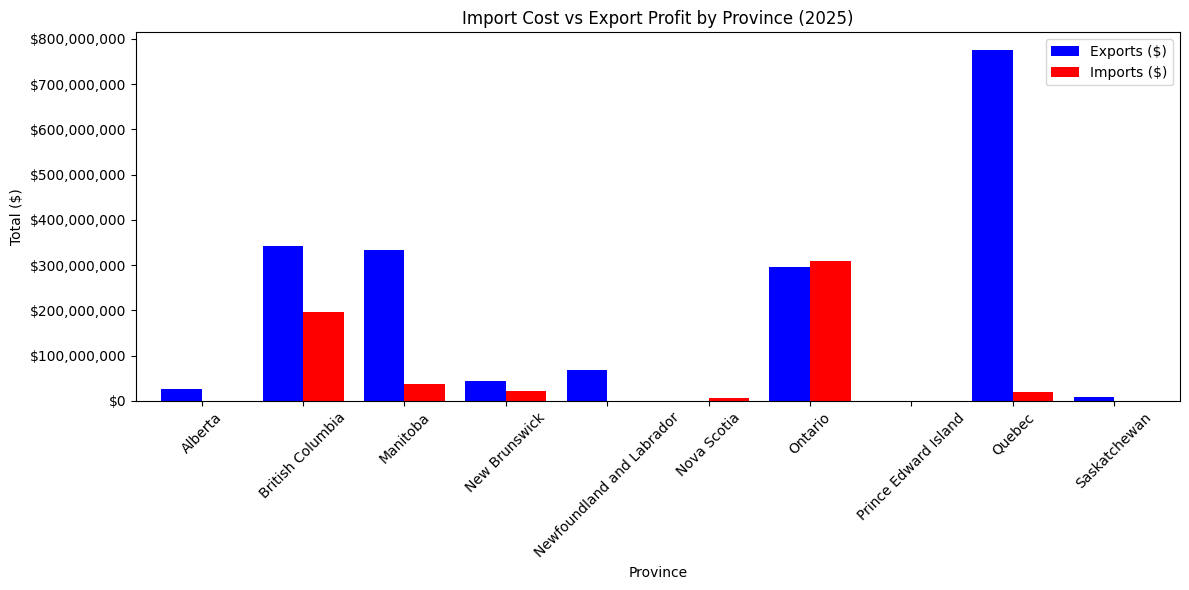

In [86]:
exports_total_profit = get_prices(power_prices_df, national_import_export, filter_import_export="Total_Exports", year=year_filter)
imports_total_cost = get_prices(power_prices_df, national_import_export, filter_import_export="Total_Imports", year=year_filter)
combined_trade = pd.merge(
    exports_total_profit.rename(columns={"Total_Profit": "Exports ($)"}),
    imports_total_cost.rename(columns={"Total_Profit": "Imports ($)"}),
    on="Province",
    how="outer"
).fillna(0)

# canada was shown didnt want it 
combined_trade = combined_trade[combined_trade["Province"] != "Canada"]
ax = combined_trade.plot(
    x="Province",
    kind="bar",
    figsize=(12, 6),
    color=["blue", "red"],
    width=0.8,
    title="Import Cost vs Export Profit by Province (2025)"
)
plt.ylabel("Total ($)")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Results
In 2025, Quebec had the highest export profit, earning over $700 million. Ontario, B.C., and Manitoba also made strong gains from exports. Import costs were highest in Ontario and B.C., showing that even large producers still rely on imports to meet demand. Quebec had the biggest gap between export profit and import cost, highlighting its role as a major net exporter. Smaller provinces like PEI and Newfoundland had minimal import/export activity, indicating their reliance on local generation and consumption.

#### Power Interchange between provinces

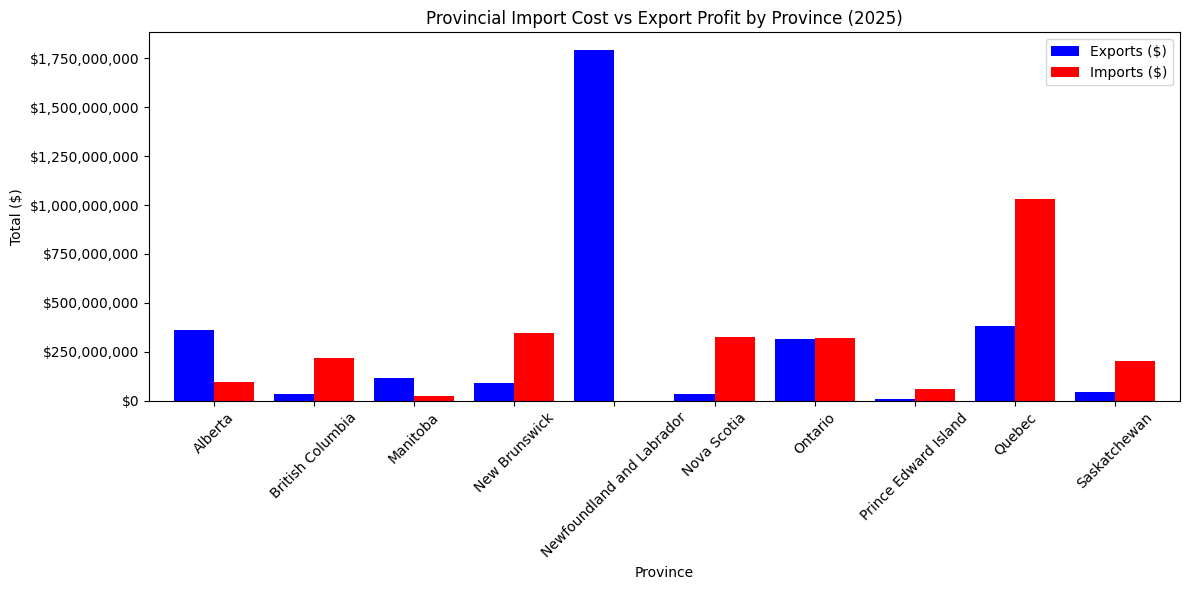

In [87]:
def get_total_provincal_totals(df, year=2025, filter_import_export="Interprovincial Out-Flows"):

    total_exports = df[df["Year"] == year].copy()
    total_exports = total_exports[total_exports["Energy_Type"] == filter_import_export]
    total_exports = total_exports.groupby("Province", as_index=False).agg({"GWh": "sum"})
    return total_exports.rename(columns={"GWh": filter_import_export})

provincial_exports = get_total_provincal_totals(power_interchange_df, year=year_filter, filter_import_export="Interprovincial Out-Flows")
provincial_imports = get_total_provincal_totals(power_interchange_df, year=year_filter, filter_import_export="Interprovincial In-Flows")
provincial_imports_exports = pd.merge(provincial_exports, provincial_imports, on="Province", how="outer")

provincial_exports_profit = get_prices(power_prices_df, provincial_imports_exports, filter_import_export="Interprovincial Out-Flows", year=year_filter)
provincial_imports_cost = get_prices(power_prices_df, provincial_imports_exports, filter_import_export="Interprovincial In-Flows", year=year_filter)
combined_provincial_trade = pd.merge(
    provincial_exports_profit.rename(columns={"Total_Profit": "Exports ($)"}),
    provincial_imports_cost.rename(columns={"Total_Profit": "Imports ($)"}),
    on="Province",
    how="outer"
).fillna(0)

combined_provincial_trade = combined_provincial_trade[combined_provincial_trade["Province"] != "Canada"]
ax = combined_provincial_trade.plot(
    x="Province",
    kind="bar",
    figsize=(12, 6),
    color=["blue", "red"],
    width=0.8,
    title=f"Provincial Import Cost vs Export Profit by Province ({year_filter})"
)
plt.ylabel("Total ($)")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Results
The data shows that Quebec even tho they are the biggest producer of energy in Canada, they import more provincially then they export. This is due to the selling of energy to the States. Canada in the middle with an export of 1.8 billion is the amount of energy that is exchanged yearly within Canada.

### Prices Across Canada

#### Analysis of Prices Across Canada

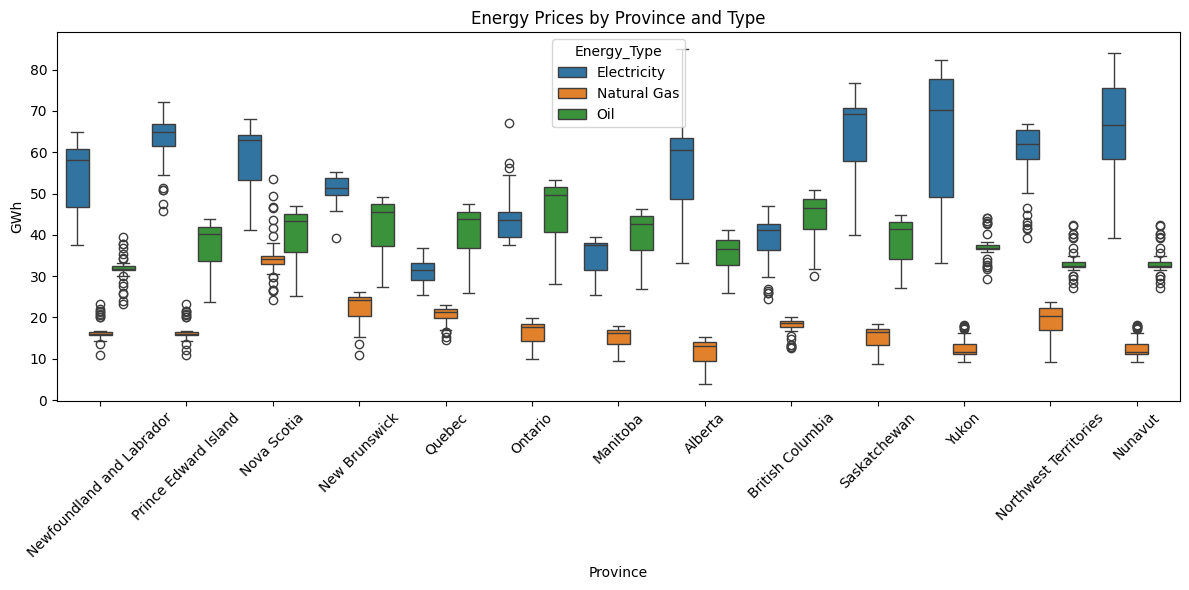

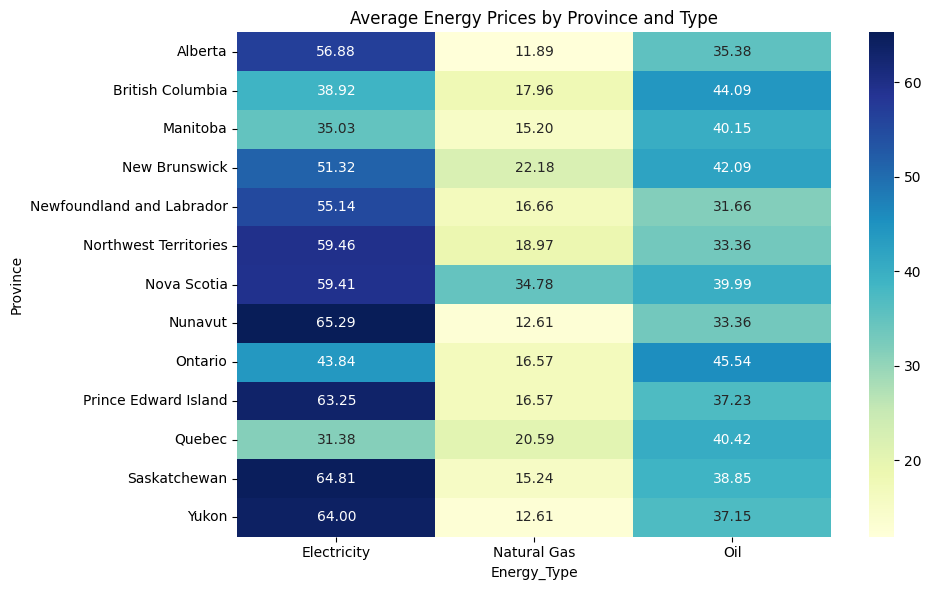

In [88]:
def get_avg_price_by_province(df):
    return df.groupby(["Province", "Year", "Energy_Type"], as_index=False).agg({"Price": "mean"})

display_price_boxplot = True
display_price_heatmap = True

if display_price_boxplot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=power_prices_df, x="Province", y="GWh", hue="Energy_Type")
    plt.title("Energy Prices by Province and Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if display_price_heatmap:
    pivot = power_prices_df.pivot_table(index="Province", columns="Energy_Type", values="GWh", aggfunc="mean")
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Average Energy Prices by Province and Type")
    plt.tight_layout()
    plt.show()

##### Results
The data shows electricity is cheapest in Quebec and Manitoba, and most expensive in Nunavut, Yukon, and Saskatchewan. Natural gas is lowest in Alberta and Yukon. Oil prices are pretty even, with some higher in Nova Scotia and Ontario. The boxplot shows more price swings in electricity, especially in the 3 Territories. The heatmap makes it easy to spot where energy is more or less expensive across types.


### Analyze Energy Usage in Different Sectors in Canada

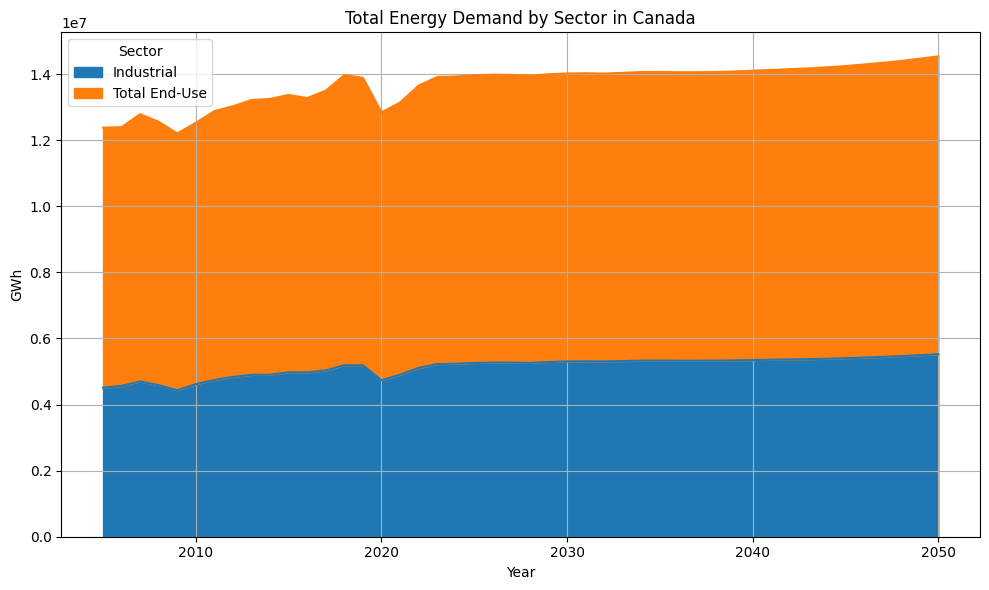

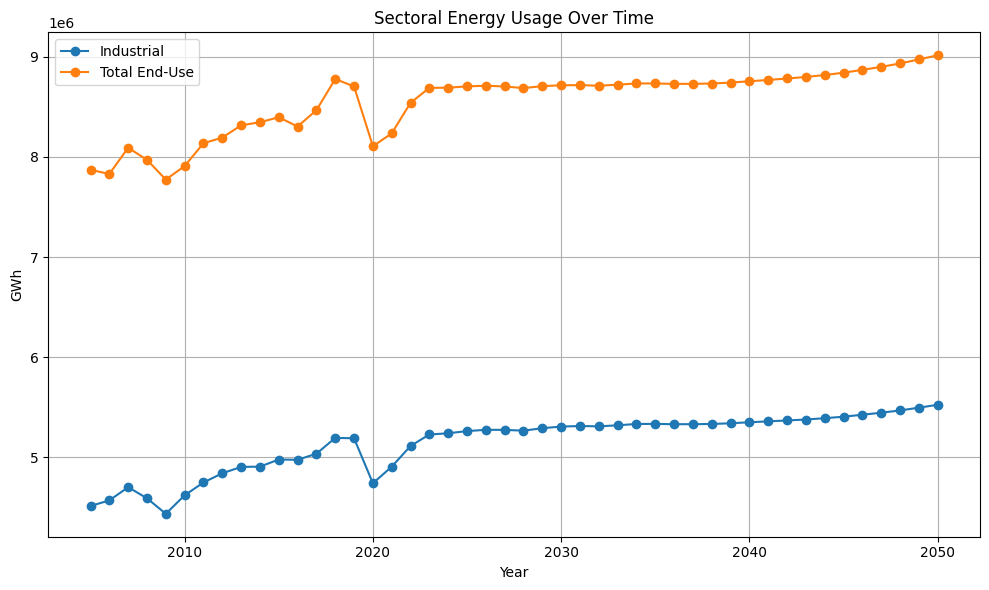

In [89]:

# PJ to GWh
power_demand_df["GWh"] = power_demand_df["PJ"] * 277.778

power_demand_df["Year"] = pd.to_numeric(power_demand_df["Year"], errors="coerce")
power_demand_df = power_demand_df.dropna(subset=["Year"])
power_demand_df = power_demand_df[power_demand_df["Year"] >= 2000]
power_demand_df["Year"] = power_demand_df["Year"].astype(int)

def get_sector_trends(df):
    return df.groupby(["Sector", "Year"], as_index=False).agg({"GWh": "sum"})

display_sector_area_total = True
display_line_per_sector = True

if display_sector_area_total:
    sector_trend = get_sector_trends(power_demand_df)
    pivot = sector_trend.pivot(index="Year", columns="Sector", values="GWh")
    pivot.plot(kind="area", stacked=True, figsize=(10, 6), title="Total Energy Demand by Sector in Canada")
    plt.ylabel("GWh")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if display_line_per_sector:
    sector_trend = get_sector_trends(power_demand_df)
    sectors = sector_trend["Sector"].unique()

    plt.figure(figsize=(10, 6))
    for sector in sectors:
        sector_data = sector_trend[sector_trend["Sector"] == sector]
        plt.plot(sector_data["Year"], sector_data["GWh"], marker="o", label=sector)

    plt.title("Sectoral Energy Usage Over Time")
    plt.xlabel("Year")
    plt.ylabel("GWh")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Conclusion and Discussion

To Conclude the analysis provided a clear view of how energy is produced, consumed, and priced across Canada, provincially and federally. The results show stronger and weaker provinces when it comes to energy production, like Quebec and BC produce mostly clean cheap hydro energy. At the same time, Alberta and Saskatchewan are more fossil-fuel dependent. Prices vary widely across Canada and are heavily affected by the types of energy produced.

&nbsp;&nbsp;&nbsp;&nbsp;The analysis also shows that Canada is a net exporter of energy with the US. With the datasets, there is also a projected energy types per province and the demand for energy. The results show a strong movement of wind and hydro throughout Canada. 

&nbsp;&nbsp;&nbsp;&nbsp;Using real government data made the project more realistic but required more cleaning and preprocessing. The setup with Jupyter made it easier for multi-user work and had individual cells for each type of analysis, allowing for an easier process to come to these results.